In [108]:
#lib para facilitar o uso de dataframes
import pandas as pd
#lib para criacao de graficos
import matplotlib.pyplot as plt
#A linha abaixo faz com que o notebook mostre o grafico na hora da plotagem
%matplotlib inline
#A linha abaixo universaliza o tamanho das figuras ao plotar
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [109]:
#lendo o daataset em csv para um dataframe pandas
df_voting = pd.read_csv('data/Congressional_Voting_Records.csv', header=None)

Vamos começar explorando os dados para apenas após começar o processo da data mining

In [110]:
##Checando head dos dados
df_voting.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


Primeiro vamos checar algumas informacoes basicas do dataframe para podermos ter um norte
para trabalhar

In [111]:
df_voting.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,435,423,387,424,424,420,424,421,420,413,428,414,404,410,418,407,331
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


Acima vemos que todas as variaveis possuem apenas dois valores, que temos apenas dois partidos e apenas respostas 'y' ou 'n' entao nao temos muito o que nos preocupar quanto ao dado em si 

Podemos ver que logo de início temos alguns valores nulos que terão quer ser substituidos para o processo funcionar bem

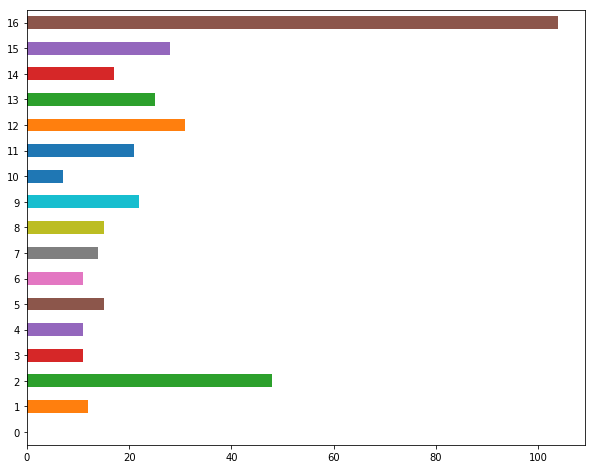

In [112]:
#Vamos contar e plotar quantos valores nulos temos em cada coluna
nan_values = df_voting.isnull().sum(axis=0)
#plotando os dados
nan_values.plot(kind='barh')

- Podemos ver pelo plot de missing data acima que todas as features, com excecao da primeira, contém valores nulos.

- Lendo sobre os dados no mesmo repositório (https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.names) vemos que a primeira coluna representa ao partido de cada votante, e as demais colunas representam as respostas que cada um deu sobre um determinado projeto

Para tratar os valores missing achamos melhor substituir pelo voto majoritario de cada partido, por exemplo paraa um valor missing do projeto 0 de um republicano, preencheremos com 'y' se a maioria dos votos do mesmo partido for 'y' e vice-versa. Escolhemos esta estratégia por que causa um enviesamento menor do que apenas preencher os dados com alguma escolha, ou do que ignora-los

In [113]:
def fill_missing(df):
    '''
    Essa funcao recebe o dataframe como entrada, realiza o preenchimento de todos os missings
    de acordo com o que foi denotado acima e retorna o mesmo dataframe preenchido
    '''
    #primeiro vamos dividir o data frame de acordo com os dois partidos
    republican_df = df.loc[df[0] == 'republican']
    democrat_df = df.loc[df[0] == 'democrat']
    
    # A linha abaixo usa a funcao apply paaraa aplicar uma funcao lambda
    # para cada coluna do dataframe
    # A funcao lambda conta os valores em cada dataframe (value_counts)
    # e retorna o indice maior contagem para cada coluna (index[0])
    # usamos esse valor para preencher os valores NaN da coluna
    
    #Para republicanos
    republican_df = republican_df.apply(lambda x:x.fillna(x.value_counts().index[0]))
    
    #paraa democratas
    democrat_df = democrat_df.apply(lambda x:x.fillna(x.value_counts().index[0]))
    
    #por fim juntamos novamente os dataframes e retornamos
    df = pd.concat([republican_df, democrat_df])
    
    #pegamos um sample de todas as linhas, apenas para randomizarmos e nao criar
    #nenhum vies de selecao nos dados ordenados por partido
    
    return df.sample(frac=1)

In [114]:
#aplicamos a funcao para retirada de missings
df_voting = fill_missing(df_voting)
#Contamos os missings novamente para averificaar o trabalho feito
print(df_voting.isnull().sum(axis=0))

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64


Nao temos nenhum missing, e aparentemente nao temos mais nenhum problemas com os dados, tornando-o prontos para serem 'minados'. Claro que poderiamos fazer N outras analises previas em cima dos dados mas isso nao é o ponto da atividade

In [115]:
#Vamos adicionar um prefixo em cada coluna para ficar mais compreensivel
#por exemplo p_0 (projeto numero 0 )...
df_voting = df_voting.add_prefix('p_')

In [116]:
#Vamos tambem transformar o partido politico em variaveis separadas e binarias para podermos utilizar no processo aprior
#A linha abaixo transforma a coluna de partidos em duas colunas preenchendo com 1 ou 0 cada uma
df_voting = pd.get_dummies(df_voting, columns=['p_0'], prefix='partido')

Aqui vamos tomar uma decisao diferente, o obvio seria transformar todos os 'y' e 'n' em 1 e 0 respectivamente por motivovs de memoria e otimizacao, entretanto os passos do algoritmo a priori iriam ficar um pouco estranhos de se interpretar, entao vamos fazer o contrario e ransformar todos os 1 e 0 em 'y' e 'n' para facilitar a interpretacao das contagens do algoritmo. Nao vimos isso como um grande problema pois o dado e relativamente pequeno e nao deve acarretar em perdas significativas

In [117]:
df_voting = df_voting.apply(lambda k: 'y' if k == 1 else 0)
df_voting = df_voting.apply(lambda k: 'y' if k == 1 else 0)

ValueError: ('The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().', 'occurred at index p_1')

In [107]:
df_voting

112    0
286    0
43     0
197    0
158    0
299    0
252    0
362    0
78     0
433    0
195    0
55     0
144    0
341    0
210    0
139    0
226    0
370    0
84     0
359    0
137    0
245    0
227    0
363    0
378    0
35     0
365    0
147    0
375    0
294    0
      ..
431    0
86     0
372    0
353    0
131    0
162    0
203    0
127    0
291    0
217    0
18     0
366    0
295    0
236    0
145    0
185    0
91     0
272    0
205    0
278    0
67     0
44     0
390    0
207    0
325    0
271    0
429    0
31     0
77     0
211    0
Length: 435, dtype: int64

In [65]:
#retornamos o dataset final em csv para ser tratado em um arquivo diferente de código a fim de
#manter a organizacao
df_voting.to_csv('data/cleaned_voting.csv', index=False)